<a href="https://colab.research.google.com/github/leorumma/arvore-decisao-v2/blob/main/arvore-decisao-parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from seaborn import heatmap
import matplotlib.pyplot as plt
import random

#criar os gráficos das árvores de decisão
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [26]:
def generate_decision_tree_png(decision_tree_clf, feature_names, file_name = 'arvore1.png'):
    # tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
    # pois o one-hot acrescenta mais
    dot_data = StringIO()
    export_graphviz(decision_tree_clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = feature_names, class_names=['No','Yes'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(file_name)
    clf_image_png = graph.create_png()
    
    Image(clf_image_png)

In [27]:
#link para o dataset: 
DATASET_URL = 'salary.csv'
dataset = pd.read_csv(DATASET_URL)
original_dataset = dataset.copy()

In [28]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
#Iniciando análise exploratória dos dados

In [30]:
#Sem valores não preenchidos nas colunas
print(len(dataset))
print(len(dataset.dropna()))

32561
32561


In [31]:
print(dataset.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [32]:
#tipos workclass
workclass_unique_values = dataset['workclass'].unique()
print(workclass_unique_values)
print(len(workclass_unique_values))

#Conclusão: podemos(e faz sentido) categorizar esses dados e utilizarmos para treinar nosso classificador

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
9


In [33]:
#tipos education
education_unique_values = dataset['education'].unique()
print(education_unique_values)
print(len(education_unique_values))

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16


In [34]:
#tipos marital-status
marital_status_unique_values = dataset['marital-status'].unique()
print(marital_status_unique_values)
print(len(marital_status_unique_values))

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
7


In [35]:
#tipos occupation
occupation_unique_values = dataset['occupation'].unique()
print(occupation_unique_values)
print(len(occupation_unique_values))

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
15


In [36]:
#tipos relationship
relationship_unique_values = dataset['relationship'].unique()
print(relationship_unique_values)
print(len(relationship_unique_values))

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
6


In [37]:
#tipos race
race_unique_values = dataset['race'].unique()
print(race_unique_values)
print(len(race_unique_values))

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
5


In [38]:
#tipos sex
sex_unique_values = dataset['sex'].unique()
print(sex_unique_values)
print(len(sex_unique_values))

[' Male' ' Female']
2


In [39]:
#tipos native-country
native_country_unique_values = dataset['native-country'].unique()
print(native_country_unique_values)
print(len(native_country_unique_values))

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
42


In [40]:
#tipos native-country
salary_unique_values = dataset['salary'].unique()
print(salary_unique_values)
print(len(salary_unique_values))

[' <=50K' ' >50K']
2


<AxesSubplot:>

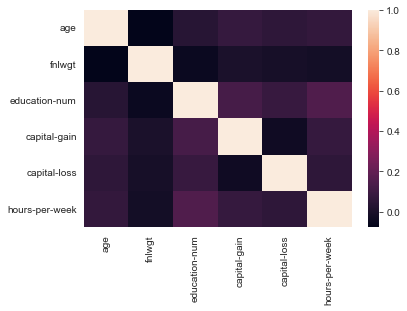

In [41]:
heatmap(dataset.corr())

In [42]:
#Transformação do dataset, seleção das features

feature_cols = ['age', 'fnlwgt', 'hours-per-week']
target_col = 'salary'

dummy_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

prepared_dummy_columns = pd.get_dummies(dataset[dummy_columns])

combined = pd.concat([dataset, prepared_dummy_columns], axis=1)

feature_cols.extend(prepared_dummy_columns.columns.values.tolist())

X = combined[feature_cols]
y = combined[target_col]

X.head()

,age,fnlwgt,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Treino
test_percentage = 0.05
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=test_percentage)

# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)

# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)

print('| Train accuracy | Test accuracy | : | {0} | {1} |'.format(train_accuracy, test_accuracy))

| Train accuracy | Test accuracy | : | 0.9999353420406052 | 0.7980356046654389 |


In [44]:
generate_decision_tree_png(clf, X.columns)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.218445 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.218445 to fit



In [45]:
#Teste
random_element = random.randint(0, len(X))
sample = X.iloc[[random_element]]
target_of_sample = y.iloc[[random_element]]

pred_sample = clf.predict(sample)

print(pred_sample)
print(target_of_sample)

[' <=50K']
14551     <=50K
Name: salary, dtype: object


In [46]:
def fit_and_test_decision_tree_clf(X, y,criterion, test_percentage, max_depth = 10000):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_percentage)

    # Criação do classificador de árvore de decisão 
    classifier = DecisionTreeClassifier(criterion=criterion, max_depth = max_depth)

    # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
    classifier = classifier.fit(X_train, y_train)
    
    train_accuracy = classifier.score(X_train, y_train)

    # Usando modelo para classificar os dados que temos a disposição
    y_pred = classifier.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return classifier, train_accuracy, test_accuracy

In [47]:
def calculateDecisionTreeKfold(n_splits, shuffle, random_state, X, y):
    kfold = KFold(n_splits, shuffle=shuffle, random_state=random_state)
    model_dtc_kfold_3_entropy = DecisionTreeClassifier(criterion="entropy")
    print(kfold.get_n_splits(X))
    # Médias
    accuracy_med_train = 0
    accuracy_med_test = 0
    count_split = 0
    for train_index, test_index in kfold.split(X):
        count_split +=1
        print(" Treino:", train_index, "Teste:", test_index)
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        model_dtc_kfold_3_entropy.fit(X_train, y_train)
        y_pred_train = model_dtc_kfold_3_entropy.predict(X_train)
        y_pred_test = model_dtc_kfold_3_entropy.predict(X_test)
        # Cálculo das acurácias
        accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
        accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
        print("Iteração: " + str(count_split) + " \n" + "Acurácia do treinamento: " + str(accuracy_train) + " \n" + "Acurácia do teste: " + str(accuracy_test))
        # Cálculo das médias
        accuracy_med_train += accuracy_train/kfold.get_n_splits(X)
        accuracy_med_test += accuracy_test/kfold.get_n_splits(X)
    print("Acurácia média do treinamento:", accuracy_med_train)
    print("Acurácia média do teste:", accuracy_med_test)

# Experimento n:
**Situação Inicial:**
* Classificador **Entropy**
* K-fold 14

In [48]:
calculateDecisionTreeKfold(14, True, 80, X, y)

14
 Treino: [    0     1     2 ... 32558 32559 32560] Teste: [    4     6    36 ... 32549 32553 32555]
Iteração: 1 
Acurácia do treinamento: 0.9999338514966098 
Acurácia do teste: 0.7708512467755804
 Treino: [    1     3     4 ... 32557 32558 32560] Teste: [    0     2    39 ... 32505 32554 32559]
Iteração: 2 
Acurácia do treinamento: 0.9999669257483049 
Acurácia do teste: 0.7833190025795357
 Treino: [    0     1     2 ... 32558 32559 32560] Teste: [   11    14    19 ... 32504 32528 32539]
Iteração: 3 
Acurácia do treinamento: 0.9999338514966098 
Acurácia do teste: 0.7828890799656062
 Treino: [    0     1     2 ... 32558 32559 32560] Teste: [   15    32    44 ... 32507 32526 32548]
Iteração: 4 
Acurácia do treinamento: 0.9999338514966098 
Acurácia do teste: 0.791487532244196
 Treino: [    0     2     3 ... 32558 32559 32560] Teste: [    1     8     9 ... 32506 32513 32516]
Iteração: 5 
Acurácia do treinamento: 0.9999669257483049 
Acurácia do teste: 0.7811693895098882
 Treino: [    0   